# Amplitude Envelope

Amplitude Envelope refere-se as mudanças de amplitude de um som ao longo do tempo. </br>

O Envelope do sinal de áudio é uma característica do áudio no domínio do tempo, extraída da forma de onda de áudio bruta que se refere às flutuações na amplitude de um som ao longo do tempo.  </br>

É um recurso de som crucial porque nos permite reconhecer e discriminar sons rapidamente. 

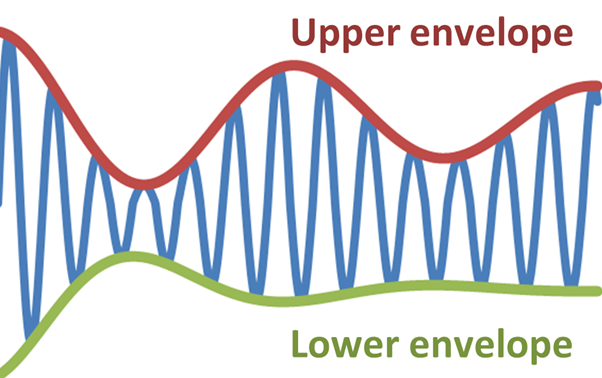

In [ ]:
!pip install Ipython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt


In [ ]:
debussy_ = '/content/8- Implementing the amplitude envelope_audio_debussy.wav'
redhot = "/content/8- Implementing the amplitude envelope_audio_duke.wav"
duke = "/content/8- Implementing the amplitude envelope_audio_redhot.wav"

In [ ]:
ipd.Audio(debussy_)

In [ ]:
ipd.Audio(redhot)

Load an audio file as a floating point time series.

Audio will be automatically resampled to the given rate (default sr=22050).

To preserve the native sampling rate of the file, use

In [ ]:
debussy, sr = librosa.load(debussy_)
redhot_, _=librosa.load(redhot)
duke_,_ = librosa.load(duke)

In [ ]:
debussy

array([-0.01742554, -0.03567505, -0.04995728, ...,  0.00912476,
        0.00866699,  0.00964355], dtype=float32)

In [ ]:
redhot_

array([-0.03326416, -0.00845337,  0.00415039, ...,  0.11965942,
        0.10794067,  0.08566284], dtype=float32)

In [ ]:
debussy.size

661500

In [ ]:
sample_duration = 1/sr
print(f'Duração de 1 amostra {sample_duration:.6f}')

Duração de 1 amostra 0.000045


In [ ]:
duration = sample_duration * len(debussy)

print(f'Duração de 1 amostra {duration:.6f}')

Duração de 1 amostra 30.000000


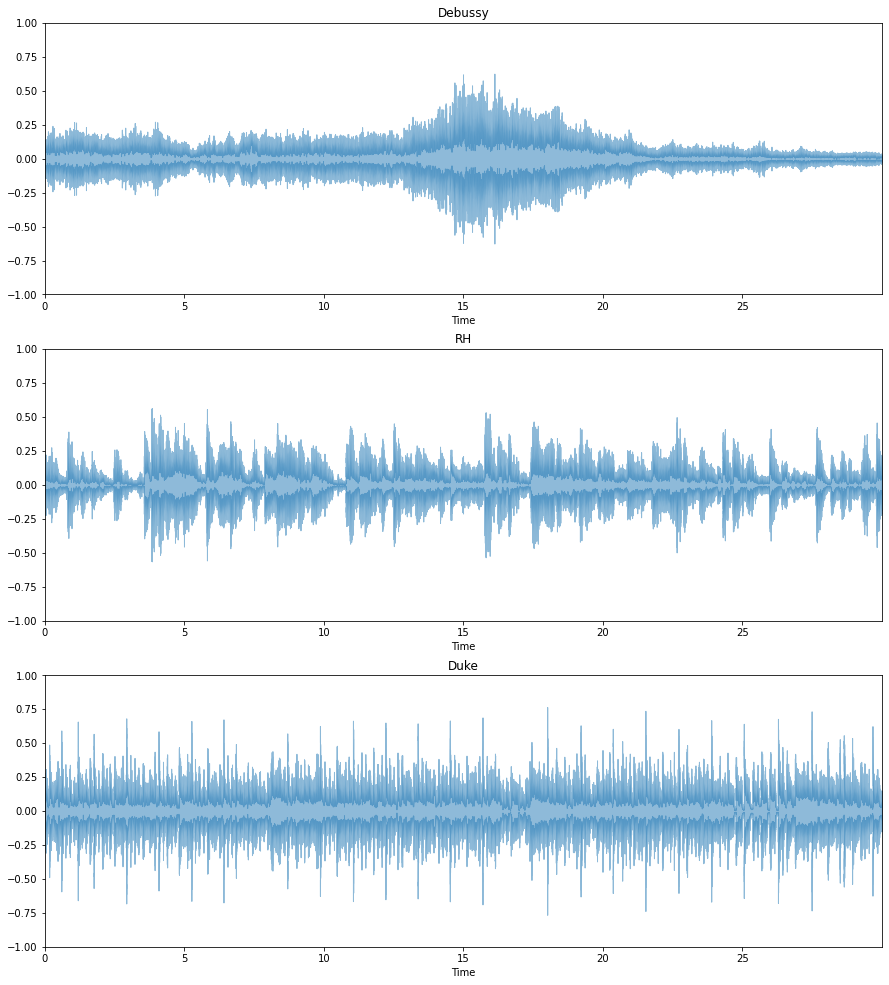

In [ ]:
plt.figure(figsize=(15,17))

plt.subplot(3,1,1)
librosa.display.waveplot(debussy,alpha=0.5)
plt.title("Debussy")
plt.ylim((-1,1))


plt.subplot(3,1,2)
librosa.display.waveplot(redhot_,alpha=0.5)
plt.title("RH")
plt.ylim((-1,1))


plt.subplot(3,1,3)
librosa.display.waveplot(duke_,alpha=0.5)
plt.title("Duke")
plt.ylim((-1,1))

plt.show()

Amplitude Envelope

In [ ]:
import numpy as np

In [ ]:
FRAME_SIZE=1024
HOP_LENGTH = 512

In [ ]:
FRAME_SIZE = 1024
HOP_LENGTH = 512

def amplitude_envelope(signal, frame_size, hop_length):
    amplitude_envelope = []
    for i in range(0, len(signal), hop_length): 
        amplitude_envelope_current_frame = max(signal[i:i+frame_size]) 
        amplitude_envelope.append(amplitude_envelope_current_frame)
    
    return np.array(amplitude_envelope) 

In [ ]:
def fancy_amplitude_envelope(signal, frame_size, hop_length):
    """Fancier Python code to calculate the amplitude envelope of a signal with a given frame size."""
    return np.array([max(signal[i:i+frame_size]) for i in range(0, len(signal), hop_length)])

In [ ]:
ae_debussy = amplitude_envelope(debussy, FRAME_SIZE,HOP_LENGTH )
len(ae_debussy)

1292

In [ ]:
ae_redhot = amplitude_envelope(redhot_, FRAME_SIZE,HOP_LENGTH )
len(ae_redhot)

1292

In [ ]:
ae_duke = amplitude_envelope(duke_, FRAME_SIZE,HOP_LENGTH )
len(ae_duke)

1292

In [ ]:
fancy_ae_debussy = fancy_amplitude_envelope(debussy,FRAME_SIZE,HOP_LENGTH)

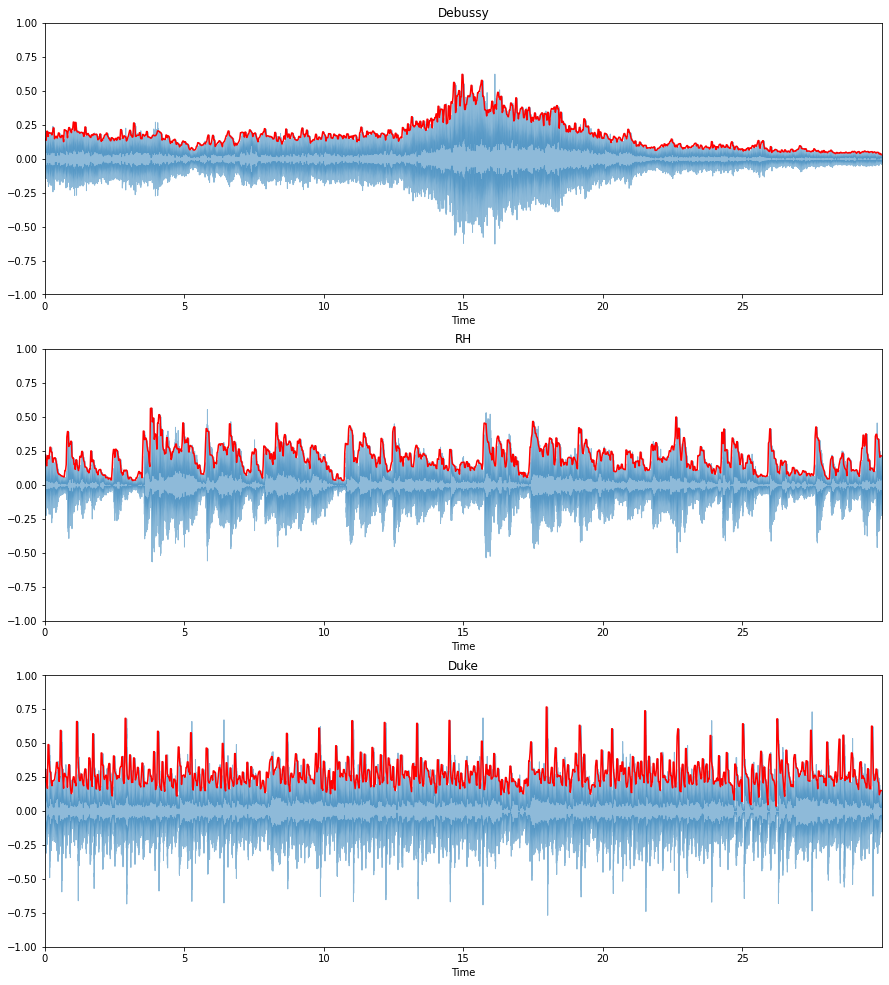

In [ ]:

frames = range(0,ae_debussy.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

plt.figure(figsize=(15,17))

plt.subplot(3,1,1)
librosa.display.waveplot(debussy,alpha=0.5)
plt.plot(t,ae_debussy,color='r')
plt.title("Debussy")
plt.ylim((-1,1))

plt.subplot(3,1,2)
librosa.display.waveplot(redhot_,alpha=0.5)
plt.plot(t,ae_redhot,color='r')
plt.title("RH")
plt.ylim((-1,1))

plt.subplot(3,1,3)
librosa.display.waveplot(duke_,alpha=0.5)
plt.plot(t,ae_duke,color='r')
plt.title("Duke")
plt.ylim((-1,1))

plt.show()